In [1]:
import sys
print(sys.version)

3.8.2 (default, Apr 27 2020, 15:53:34) 
[GCC 9.3.0]


In [2]:
import json
import os
import pandas as pd
import requests
import bs4
from lxml import html
from fake_useragent import UserAgent

In [3]:
def get_yelp_data(path):
    with open(path, 'r') as file:
        raw_data = file.readlines()
    raw_data = map(lambda x: x.rstrip(), raw_data)
    json_data = '[' + ','.join(raw_data) + ']'
    df = pd.read_json(json_data)
    return df

In [4]:
file_type = 'business'
#'checkin' : 'yelp_academic_dataset_checkin.json',
#'review' : 'yelp_academic_dataset_review.json', # the file size is 6.3G 
#'tip' : 'yelp_academic_dataset_tip.json',
#'user' : 'yelp_academic_dataset_user.json' # the file size is 3.3G 

path = os.path.join('..', '..', 'yelp_dataset', 'yelp_academic_dataset_' + file_type + '.json')
df = get_yelp_data(path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [56]:
lon = df['longitude'].values
lat = df['latitude'].values

In [57]:
import os
os.environ['PROJ_LIB'] = '/home/beginner1010/anaconda3/share/proj'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


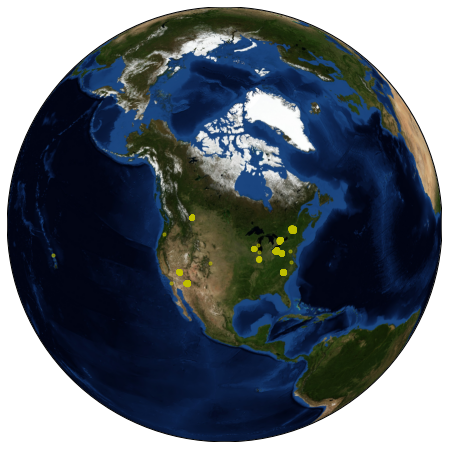

In [58]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)
m.scatter(lon, lat, latlon=True, c='y', s = 10, alpha=0.5)
plt.show()